In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

*Readings: Chapter 4*

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

## Logistic Regression: Intuition
- Picture the data as points on the plane.
- A classifier's job is to determine the decision regions for each class.
- If a point is far from the decision boundary, then the classifier should be fairly confident about its prediction.
- If a point is near the decision boundary, then the classifier may be less confident about its prediction.
- The **logistic regression** model aims to provide a **probablity distribution** for each point. The probability distribution has little variance if the point is far from decision boundary.
- **Probability distribution with high variance**: rolling a die - there is no way to predict the exact outcome
- **Probability distribution with low variance**: getting the flu today - probably not going to happen

<img src="https://mlr-org.com/docs/2015-07-28-Visualisation-of-predictions_files/figure-html/qda-1.png" width="600">

## Binary Classifier
- Suppose there are only two classes for the output feature: **Class 0** (the negative class) and **Class 1** (the positive class).
- A **binary classifer** tries to estimate the probability $p$ that a point belongs to Class 1.
- The probability that a point belongs to Class 0 is $1 - p$.
- Given the probability, the binary classifier will compare it with a chosen **threshold** (for example, 0.5), and then predict the class as
    - prediction = 1 if $\hat{p}$ $\ge$ threshold
    - prediction = 0 if $\hat{p}$ < threshold
- The **boundary** of decision regions is given by the curve formed by points whose probability equals to the threshold value.

## Logistic Regression: Model Assumption
**Binary classifier model**: Logistic regression model assumes that the decision boundary is represented as a linear function:

$\log\frac{\hat{p}}{1 - \hat{p}} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n,$
- n: number of input features.
- $x_1, ..., x_n$: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (1, x_1, ..., x_n)$.
- $\theta = (\theta_0, \theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

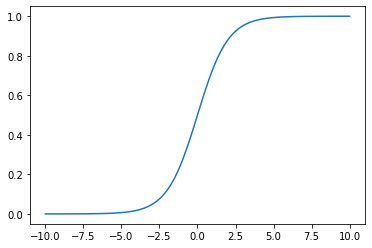

In [2]:
# Plot the graph of logistic function

# 1. Pick a list of x coordinates (`np.linspace`)
x = np.linspace(-10, 10, 100)
# 2. For each x, find the value of the function
# values = []
# for i in x:
#     value = 1  / (1 + np.exp(-i))
#     values.append(value)
values = 1 / (1 + np.exp(-x)) # Since x is a numpy array, we can apply
                                # np.exp directly
# 3. plot the list of x coordinates and y coordinates using
# plt.plot()
plt.plot(x, values, )
# print(len(values))

## Logistic Regression: Decision Rule

**Decision rule**: Pick a threshold (for example, 0.5), and then

- prediction = 1 if $\hat{p}$ $\ge$ threshold
- prediction = 0 if $\hat{p}$ < threshold

**Trade-off with threshold**:
- If threshold is chosen closer to 1, then the positive predictions are __more likely__ to be correct (fewer **false positives**). However, the negative predictions are __less likely__ to be correct.
- If threshold is chosen closer to 0, then the negative predictions are __more likely__ to be correct (fewer **false negatives**). However, the positive predictions are __less likely__ to be correct.

<img src="https://hackernoon.com/hn-images/1*YV7zy1NGN1-HGQxY56nc_Q.png" width="600">

## Logistic Regression Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)

<img src="https://lh3.googleusercontent.com/proxy/kGs0Y8tElhGYuH6BUpxNg4F14JsepyVrrWUfMoN-uUKaJh-V3AUHsWI6b4zBTy3z-ipCrXMG8IRQxaiIRyxMfSU" width="600">


In [3]:
# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Explore the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Add the target class
# print(iris['target'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
123,6.3,2.7,4.9,1.8,2
139,6.9,3.1,5.4,2.1,2
103,6.3,2.9,5.6,1.8,2
129,7.2,3.0,5.8,1.6,2
146,6.3,2.5,5.0,1.9,2
51,6.4,3.2,4.5,1.5,1
8,4.4,2.9,1.4,0.2,0
142,5.8,2.7,5.1,1.9,2
131,7.9,3.8,6.4,2.0,2
98,5.1,2.5,3.0,1.1,1


In [10]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [11]:
# Create a function that maps 0-2 to the actual type of iris
def get_target_name(x):
    return iris['target_names'][x]

x = iris_df.loc[124, 'target']
name = get_target_name(x)
print(x, name)

2 virginica


In [12]:
# Apply get_target_name() to all target values
iris_df['target_name'] = iris_df['target'].apply(get_target_name)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
66,5.6,3.0,4.5,1.5,1,versicolor
32,5.2,4.1,1.5,0.1,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
10,5.4,3.7,1.5,0.2,0,setosa
112,6.8,3.0,5.5,2.1,2,virginica


In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


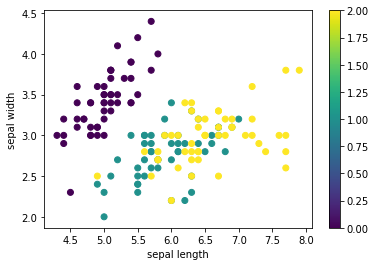

In [15]:
# Draw scatter plots.
# scatter plot: sepal length vs. sepal width
# Use .loc to extract sepal length is too tedious:
# iris_df['sepal length (cm)']
# Use .iloc is much easier: we just need to use its integer index
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'])
plt.colorbar()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

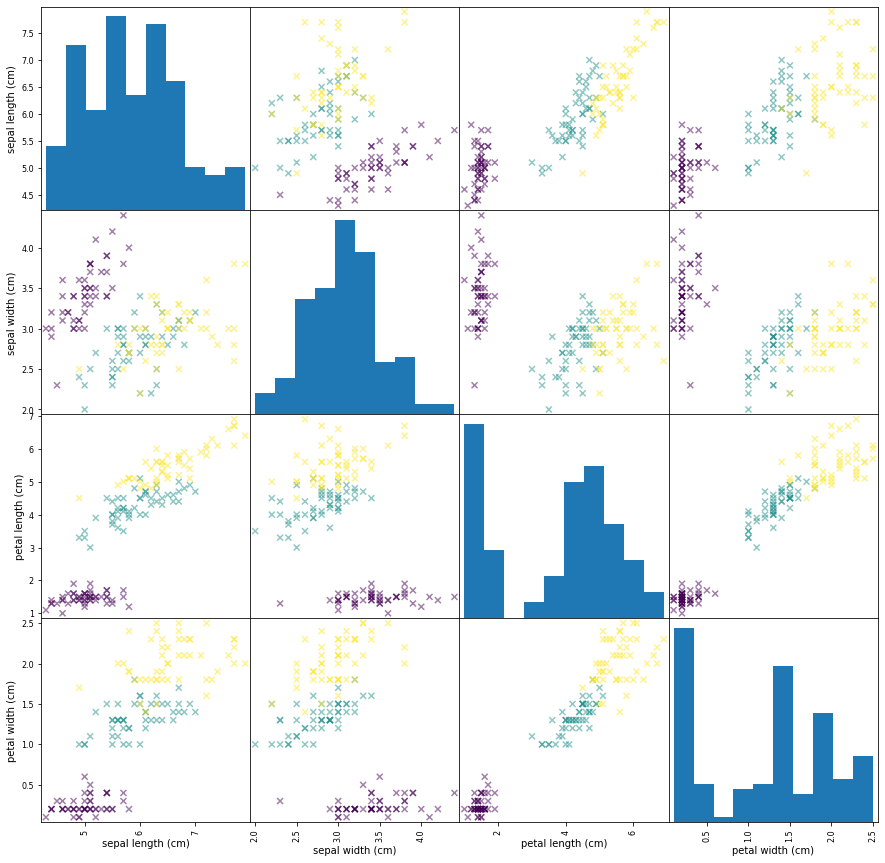

In [16]:
# Draw all scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:, :4], figsize=(15, 15), marker='x',
               c=iris_df['target'])
plt.show()

## Build A Binary Classifier for Iris-Virginica

In [17]:
# Define a function is_virginica(target) that returns 1 if target is Virginica, and 0 otherwise
def is_virginica(target):
    if target == 'virginica':
        return 1
    else:
        return 0
    
target = iris_df.loc[50, 'target_name']
print(target, is_virginica(target))

versicolor 0


In [18]:
# Apply function is_virginica() to the data frame, creating a new 
# column "Is_Virginica"
iris_df['Is_Virginica'] = iris_df['target_name'].apply(is_virginica)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [19]:
# Train-test split
# Split the data frame into 85% training data and 15% test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris_df, test_size = 0.15)
print(df_train.shape, df_test.shape)

(127, 7) (23, 7)


In [20]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
61,5.9,3.0,4.2,1.5,1,versicolor,0
30,4.8,3.1,1.6,0.2,0,setosa,0
40,5.0,3.5,1.3,0.3,0,setosa,0
63,6.1,2.9,4.7,1.4,1,versicolor,0
67,5.8,2.7,4.1,1.0,1,versicolor,0


In [21]:
# Display the amount of Virginica and non-Virginica cases in the training set
print(df_train['Is_Virginica'].value_counts())
print(df_test['Is_Virginica'].value_counts())

0    82
1    45
Name: Is_Virginica, dtype: int64
0    18
1     5
Name: Is_Virginica, dtype: int64


In [22]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(df_train.iloc[:, :4], df_train['Is_Virginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation
- Classification accuracy
- Cross Validation
- Examine four categories using the confusion matrix:
    - True Positive
    - True Negative
    - False Positive
    - False Negative
- Precision, recall, and F1 score

In [23]:
# 1. Find the prediction accuracy on test set
from sklearn.metrics import accuracy_score
prediction = model.predict(df_test.iloc[:, :4])
accuracy = accuracy_score(df_test['Is_Virginica'], prediction)
print(accuracy)

0.9565217391304348


In [29]:
# 2. cross validation
from sklearn.model_selection import cross_val_score
input_cols = iris_df.columns[:4]
print(cross_val_score(model, df_train[input_cols], df_train['Is_Virginica'],
                      cv=3))

[1.         0.97619048 0.95238095]


In [32]:
# 3. confusion matrix
from sklearn.metrics import confusion_matrix
test_predictions = model.predict(df_test[input_cols])
print(test_predictions)
matrix = confusion_matrix(df_test['Is_Virginica'], test_predictions)
# plt.matshow(matrix)
print(matrix)

[0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0]
[[17  1]
 [ 0  5]]


### Precision and Recall
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width="600">

In [38]:
# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_test['Is_Virginica'], test_predictions) # How much Virigincia iris are correctly identified?
recall = recall_score(df_test['Is_Virginica'], test_predictions) # How much Virginica predictions are correct?
f1 = f1_score(df_test['Is_Virginica'], test_predictions)
print(precision, recall, f1)

0.8333333333333334 1.0 0.9090909090909091


In [43]:
# Besides checking the classification, we can examine the probabilities.
predictions = model.predict(df_test[input_cols])
print(predictions)
predictions_probabilities = model.predict_proba(df_test[input_cols])

def beautify_probs(probs):
    # extract the first prob from each distribution
    sub_probs = [ls[1] for ls in probs]
    # convert the number to a string with formatting
    # %5.3f: floating point number, 5 character long, 3 decimal digits 
    sub_probs_string = ["%5.3f" % value for value in sub_probs]
    return sub_probs_string

beautify_probs([[0.9, 0.1],
                [0.22222, 0.777778]])

print(beautify_probs(predictions_probabilities))

[0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0]
['0.000', '0.000', '0.997', '0.000', '0.000', '0.000', '0.578', '0.040', '0.000', '0.020', '0.317', '0.956', '0.000', '0.882', '0.000', '0.992', '0.000', '0.192', '0.927', '0.000', '0.015', '0.000', '0.175']


## Logistic Regression: Model Visualization
- Create a grid of points from a list of x coordinates and y coordinates.
- Use the model to obtain prediction probability on each point from the grid
- Find points with marginal probabilities.
- Plot the grid.

In [45]:
# Train a new logistic regression model on petal length and petal width only
model2 = LogisticRegression(solver='lbfgs')
model2.fit(df_train.iloc[:, 2:4], df_train['Is_Virginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]


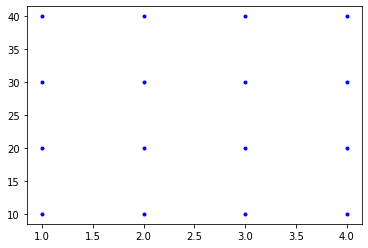

In [47]:
x_coordinates = [1, 2, 3, 4]
y_coordinates = [10, 20, 30, 40]
xx, yy = np.meshgrid(x_coordinates, y_coordinates)
print(xx)
print(yy)
plt.plot(xx, yy, 'b.')

In [48]:
# 1. Create a grid of points
x0, x1 = np.meshgrid(np.linspace(0, 7, 100),
                     np.linspace(0, 2.7, 100))
print(x0.shape, x1.shape)

(100, 100) (100, 100)


In [50]:
# 2. Obtain prediction probabilities
X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model2.predict_proba(X_new)

In [54]:
# 3. Find boundary points.
# Which points give 0.5 probability?
indices = np.where((y_new_prob[:, 1] > 0.49) & (y_new_prob[:, 1] < 0.51))
X_boundary = X_new[indices]

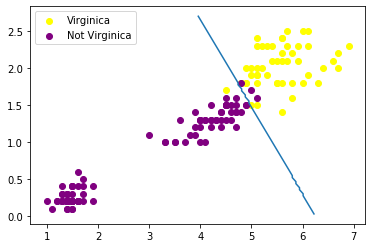

In [55]:
# 4. Plot the boundary
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
index_virginica = (iris_df['Is_Virginica'] == 1)
index_not_virginica = (iris_df['Is_Virginica'] == 0)
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()

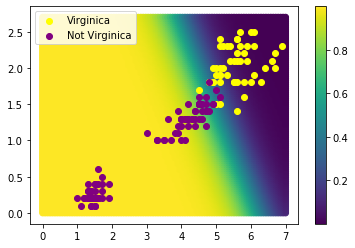

In [56]:
# 5. Plot probabilities
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_prob[:, 0])
plt.colorbar()
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()